In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Данные из таблицы
x_nodes = np.array([0.02, 0.08, 0.12, 0.17, 0.23, 0.30])
y_nodes = np.array([1.02316, 1.09590, 1.14725, 1.21483, 1.30120, 1.40976])

In [10]:
# Точки, для которых требуется вычислить значения функции
x_values = np.array([0.102, 0.114, 0.125, 0.203, 0.154])

# Функция для вычисления базисных полиномов l_i(x)
def lagrange_basis(x, i, x_nodes):
    basis = 1
    for j in range(len(x_nodes)):
        if j != i:
            basis *= (x - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
    return basis

In [11]:
# Функция для вычисления многочлена Лагранжа
def lagrange_polynomial(x, x_nodes, y_nodes):
    L = 0
    for i in range(len(x_nodes)):
        L += y_nodes[i] * lagrange_basis(x, i, x_nodes)
    return L

In [12]:
# Построение графика
x_plot = np.linspace(min(x_nodes), max(x_nodes), 500)
y_plot = [lagrange_polynomial(x, x_nodes, y_nodes) for x in x_plot]

# Вычисление значений функции в заданных точках
y_values = [lagrange_polynomial(x, x_nodes, y_nodes) for x in x_values]

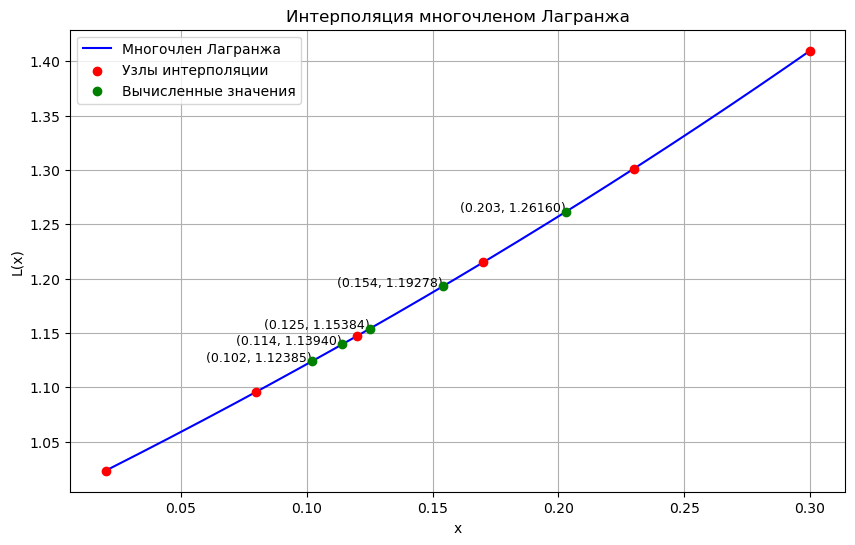

In [13]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='Многочлен Лагранжа', color='blue')
plt.scatter(x_nodes, y_nodes, color='red', label='Узлы интерполяции', zorder=5)
plt.scatter(x_values, y_values, color='green', label='Вычисленные значения', zorder=5)

# Добавление подписей
for i, (x, y) in enumerate(zip(x_values, y_values)):
    plt.text(x, y, f'({x:.3f}, {y:.5f})', fontsize=9, ha='right')

plt.title('Интерполяция многочленом Лагранжа')
plt.xlabel('x')
plt.ylabel('L(x)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Вывод значений функции в заданных точках
for x, y in zip(x_values, y_values):
    print(f'L({x:.3f}) = {y:.5f}')

L(0.102) = 1.12385
L(0.114) = 1.13940
L(0.125) = 1.15384
L(0.203) = 1.26160
L(0.154) = 1.19278
